In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import itertools
import colorsys

In [44]:
tools_dir_path = os.path.abspath('')
root_dir_path = os.path.dirname(tools_dir_path)
print(root_dir_path)
results_dir_path = os.path.join(root_dir_path, 'results')

/Users/fanqu/programs/algorithm/hashtable/hashtable-bench


In [78]:
# cur_data_dir_name = 'amd-3990x'
# cur_data_dir_name = 'm1-max-202207'
# cur_data_dir_name = 'E3-1270v6'
cur_data_dir_name = 'E2286G-compare'
# cur_data_dir_name = 'E2286G-tail'
# cur_data_dir_name = 'Xeon-E-2286G'
# cur_data_dir_name = 'Xeon-E-2286G-str'
# cur_data_dir_name = 'Xeon-E-2286G-mem'
# cur_data_dir_name = 'm1-max-str'
# cur_data_dir_name = 'm1-str-print-long'
# cur_data_dir_name = 'm1-mem'
# cur_data_dir_name = 'tempdata'
# cur_data_dir_name = 'data-xeon-6144'
# cur_data_dir_name = 'm1-max-compare'
# cur_data_dir_name = 'pi4'
platform_name = cur_data_dir_name
# platform_name = 'M1-Max'
platform_name = "Xeon-E-2286G"
cur_data_dir_path = os.path.join(results_dir_path, cur_data_dir_name)
cur_csv_dir_path = os.path.join(cur_data_dir_path, 'csv')
export_fig_dir_path = os.path.join(cur_data_dir_path, 'figs')
export_chartjs_dir_path = os.path.join(cur_data_dir_path, 'chart_js')
if not os.path.exists(export_fig_dir_path):
    os.mkdir(export_fig_dir_path)
if not os.path.exists(export_chartjs_dir_path):
    os.mkdir(export_chartjs_dir_path)

In [79]:
def gen_rgb_list(color_num, start_h = 0.0):
    h_list = [(start_h + i * (1.0 / (color_num))) % 1.0 for i in range(color_num)]
    rgb_list = []
    for i in range(color_num):
        h = h_list[i]
        new_color = colorsys.hsv_to_rgb(h, 0.55, 0.95)
        rgb_list.append(new_color)
    return rgb_list

In [80]:
filename_list = [f for f in os.listdir(cur_csv_dir_path) if os.path.isfile(os.path.join(cur_csv_dir_path, f))]
data_filename_pattern = re.compile(r'(.+)__(.+)__(.+)__(.+)\.csv')
data_filename_list = []
data_filepath_list = []
map_name_list = []
hash_name_list = []
key_name_list = []
value_name_list = []
k_v_dict = {}
for filename in filename_list:
    match_ret = data_filename_pattern.findall(filename)
    if match_ret:
        data_file_path = os.path.join(cur_csv_dir_path, filename)
        data_filepath_list.append(data_file_path)
        data_filename_list.append(filename)
        temp_map_name = match_ret[0][0]
        temp_hash_name = match_ret[0][1]
        map_name_list.append(temp_map_name)
        hash_name_list.append(temp_hash_name)
        key_name_list.append(match_ret[0][2])
        value_name_list.append(match_ret[0][3])
        temp_k_v_name =  platform_name + '_' + '<' + match_ret[0][2] + ',' + match_ret[0][3] + '>'
        # k_v_name_list.append(temp_k_v_name)
        if not temp_k_v_name in k_v_dict:
            k_v_dict[temp_k_v_name] = {'data_filepath_list':[], 'hash_name_list':[], 'map_name_list':[]}
        k_v_dict[temp_k_v_name]['data_filepath_list'].append(data_file_path)
        k_v_dict[temp_k_v_name]['hash_name_list'].append(temp_hash_name)
        k_v_dict[temp_k_v_name]['map_name_list'].append(temp_map_name)
print("total %d data files" % (len(data_filename_list)))
map_name_set = set(map_name_list)
hash_name_set = set(hash_name_list)
map_name_list = list(map_name_set)
hash_name_list = list(hash_name_set)
map_hash_list = []
map_name_list.sort()
hash_name_list.sort()
for map_name in map_name_list:
    for hash_name in hash_name_list:
        map_hash_name = map_name + "," + hash_name
        map_hash_list.append(map_hash_name)
map_hash_name_num = len(map_hash_list)
map_num = len(map_name_list)
hash_num = len(hash_name_list)
rgb_list = gen_rgb_list(map_hash_name_num * 10, 2 * 1.0 / map_num)
map_hash_to_rgb_dict = {}
for i, map_name in enumerate(map_name_list):
    for j, hash_name in enumerate(hash_name_list):
        use_rgb = rgb_list[i * hash_num * 10 + j * 8]
        map_hash_to_rgb_dict[map_hash_list[i * hash_num + j]] = use_rgb
# 
# rgb_list = gen_rgb_list(map_num)
# map2rgb_dict = {}
# for i in range(map_num):
    # map2rgb_dict[map_name_list[i]] = rgb_list[i]
marker_iter = itertools.cycle(('^','o','s','x','p','<','*','>','+','v','D'))
point_style_iter = itertools.cycle(('circle', 'rect', 'triangle', 'rectRot', 'rectRounded', 'cross', 'crossRot', 'star'))
hash2marker_dict = {}
hash2style_dict = {}
for hash_name in hash_name_list:
    hash2marker_dict[hash_name] = next(marker_iter)
    hash2style_dict[hash_name] = next(point_style_iter)
print(data_filename_list)
print(map_name_set)
print(hash_name_set)
print("map_hash_name_num: %d" % map_hash_name_num)
print(k_v_dict.keys())
# print(map2rgb_dict)
print(hash2marker_dict)
print(hash2style_dict)

total 2 data files
['ska::flat_hash_map__std::hash__mask_split_bits_uint64_t__uint64_t.csv', 'ska::flat_hash_map_h_p__std::hash__mask_split_bits_uint64_t__uint64_t.csv']
{'ska::flat_hash_map', 'ska::flat_hash_map_h_p'}
{'std::hash'}
map_hash_name_num: 2
dict_keys(['Xeon-E-2286G_<mask_split_bits_uint64_t,uint64_t>'])
{'std::hash': '^'}
{'std::hash': 'circle'}


In [81]:
def get_color(index):
    color_table = [
        
        "#16a085","#27ae60","#2980b9","#8e44ad","#2c3e50",
        "#f1c40f","#e67e22","#e74c3c",
         "#d63031","#feca57","#5f27cd","#54a0ff","#01a3a4",
        "#25CCF7","#FD7272","#54a0ff","#00d2d3",
        "#1abc9c","#2ecc71","#3498db","#9b59b6","#34495e",
        # "#ecf0f1", "#bdc3c7", "#dfe6e9", 
        "#00b894","#00cec9","#0984e3","#6c5ce7","#ffeaa7",
        "#fab1a0","#ff7675","#fd79a8","#fdcb6e","#e17055",
        "#95a5a6","#f39c12","#d35400","#c0392b",
        "#55efc4","#81ecec","#74b9ff","#a29bfe",
        "#7f8c8d", # grey
        
       
    ]
    color_num = len(color_table)
    index %= color_num
    color_hex = color_table[index]
    color_int = int(color_hex.lstrip('#'),16)
    blue_int = color_int % 256
    color_int //= 256
    green_int = color_int % 256
    red_int = color_int // 256
    return red_int, green_int, blue_int

In [82]:
def get_bg_color(red, green, blue):
    return (red + 255) // 2, (green + 255) // 2, (blue + 255) // 2

In [83]:
def fraction_rgb_to_int(rgb_tuple):
    return round(rgb_tuple[0] * 255.0), round(rgb_tuple[1] * 255.0), round(rgb_tuple[2] * 255.0)

In [84]:
def min_exclude_zero(arr):
    ret = 1e+14
    for v in arr:
        if abs(v) > 1e-8:
            ret = min(ret, v)
    if abs(ret - (1e+14)) < 1e-6:
        return 0.0
    return ret

def get_yaxis_min(min_value):
    return min_value * 0.9

# use lower precision than default
def arr2str(arr):
    ret = '['
    length = len(arr)
    for i, v in enumerate(arr):
        if i + 1 < length:
            ret += '%.3f,' % v
        else:
            ret += '%.3f' % v
    ret += ']'
    return ret

In [85]:
def is_two_list_same(list1, list2):
    if len(list1) != len(list2):
        return False
    length = len(list1)
    for i in range(length):
        if list1[i] != list2[i]:
            return False
    return True

def encode_title(title):
    title = title.replace('<', "lb_")
    title = title.replace('>', "_rb_")
    title = title.replace(',', "_co_")
    title = title.replace('%', 'percent')
    title = title.replace('-', '_')
    return title

def decode_title(title):
    # use '{' instead of '<' because '<' cause some strange bugs when rendering
    title = title.replace('lb_', r'{')
    title = title.replace('_rb_', r'}')
    title = title.replace('_co_', ',')
    title = title.replace('percent', '%')
    return title



def get_chart_js_str(title, x_arr_list, y_arr_list, label_list, y_axis_label, ymax=None, show_top_k_hash_only=False, show_top_k_map_hash_dict=None, use_log_yscale=True):
    ret_str = ''
    ret_str += "\n\n<!--start chart.js code for " + title + "-->\n"
    width = 400
    height = 350
    title = encode_title(title)
    ret_str += "\n<!--start canvas for " + title + "-->\n"
    ret_str += "\n\n<div class=\"chart-js-outer\"><div class=\"chart-js-inner\"><canvas id=\"%s_chart\"></canvas></div></div>\n\n" % (title)
    ret_str += "\n<!--end canvas for " + title + "-->\n\n"
    global_callback_arr_name = "create_chart_funcs"
    function_start_str = "function %s_create() {\n" % (title)
    function_end_str = "};\n"
    add_to_callback_arr_str = "%s.push(async() => {%s_create();});\n"  % (global_callback_arr_name, title)
    arr_num = len(x_arr_list)
    for i in range(1, arr_num):
        assert(is_two_list_same(x_arr_list[0], x_arr_list[i]))
    x_labels_str = "const %s_labels = " % (title)
    element_arr = x_arr_list[0]
    x_labels_str += str(list(element_arr)) + ";\n"
    # point_styles = itertools.cycle(('circle', 'rect', 'triangle', 'rectRot', 'rectRounded', 'cross', 'crossRot', 'star'))
    datasets_str = "datasets: [\n"
    point_radius = "chart_js_point_r"
    point_hover_radius = 12
    min_value_list = []
    for i in range(arr_num):
        # line_r, line_g, line_b = get_color(i)
        map_hash_name = label_list[i]
        map_name, hash_name = map_hash_name.split(',')
        y_axis_min = min_exclude_zero(y_arr_list[i])
        line_r, line_g, line_b = fraction_rgb_to_int(map_hash_to_rgb_dict[map_hash_name])
        bg_r, bg_g, bg_b = get_bg_color(line_r, line_g, line_b)
        hidden_flag = 'false'
        
        min_value_list.append(y_axis_min)
        if show_top_k_hash_only:
            if show_top_k_map_hash_dict[map_hash_name] == False:
                hidden_flag = 'true'
        if ymax is not None:
            if np.max(y_arr_list[i]) >= ymax:
                hidden_flag = 'true'
        dataset_str = "{\nlabel: '%s',\nbackgroundColor: 'rgba(%d,%d,%d,0.5)',\nborderColor: 'rgb(%d,%d,%d)',\npointStyle: '%s',\npointRadius:%s,\npointHoverRadius:%d,\nhidden: %s,\ndata: " % (
            label_list[i], bg_r, bg_g, bg_b, line_r, line_g, line_b, hash2style_dict[hash_name], point_radius, point_hover_radius, hidden_flag
        )
        dataset_str += arr2str(list(y_arr_list[i])) + ",\n},\n"
        datasets_str += dataset_str
    y_axis_min = min_exclude_zero(min_value_list)
    y_axis_min = get_yaxis_min(y_axis_min)
    datasets_str += "],\n"
    data_config_str = "const %s_data = {\nlabels: %s_labels,\n%s};\n" % (title, title, datasets_str)
    title_str = "const %s_title = {\ntext: '%s',\ndisplay: true,\n};\n" % (title, decode_title(title))
    y_scale_type = 'linear'
    if use_log_yscale:
        y_scale_type = 'logarithmic'
    scales_str = "const %s_scales = {\nx: {display: true, type: 'logarithmic',title: {text : 'element num', display: true,},},y: {min: %.3f, display: true,type: '%s',title: {text : '%s',display: true,},}};" % (title, y_axis_min, y_scale_type, y_axis_label)
    options_str = "const %s_options = {\nmaintainAspectRatio: false,\nscales: %s_scales,\nplugins:{\ntitle: %s_title,\nlegend: {\nlabels: {\nusePointStyle: true,sort: function(a,b) {return a.text.localeCompare(b.text);},},\n},\n},\n};" % (title, title, title)
    config_str = "const %s_config = {\n type: 'line',\ndata: %s_data,\noptions: %s_options,\n};\n" % (title, title, title)
    new_chart_str = "new Chart( document.getElementById('%s_chart'), %s_config,);" % (title, title)
    ret_str += "\n\n<!-- Add to call back script -->\n<script>\n\n\n" + add_to_callback_arr_str  + "\n\n</script>\n\n"
    ret_str += ("\n<script>\n\n\n/* Start of data js for %s */\n" % title) + function_start_str + x_labels_str + data_config_str + title_str + scales_str + options_str + config_str + new_chart_str + function_end_str + ("\n/* End of data js for %s */\n\n\n</script>\n" % title)
    
    ret_str += "<!--end chart.js code for " + title + "-->\n\n"
    return ret_str

In [75]:
def get_mat_sort_pos(mat):
    sorted_index_arr = np.argsort(mat, axis=0)
    sort_pos_arr = np.zeros(shape=mat.shape, dtype=np.uint64)
    for j in range(sorted_index_arr.shape[1]):
        for i in range(sorted_index_arr.shape[0]):
            # print("i: %d, j: %d" % (i, j))
            sort_pos_arr[sorted_index_arr[i][j]][j] = i
    return sort_pos_arr

def get_arr_sort_pos(arr):
    sorted_index_arr = np.argsort(arr)
    sort_pos_arr = np.zeros(shape=(len(arr)), dtype=np.uint64)
    for i in range(len(sorted_index_arr)):
        sort_pos_arr[sorted_index_arr[i]] = i
    return sort_pos_arr

In [76]:
import matplotlib.ticker as plticker
import copy
from matplotlib.ticker import FormatStrFormatter
def plot_lines(title, x_arr_list, y_arr_list, label_list, y_axis_label, ymax=None, save_fig=False, show_fig=False, export_fig_dir_path=None, save_chart_js=False, export_chartjs_dir_path=None, save_name=None, show_top_k_hash_only=True, top_k_hash_num=1, use_log_yscale=True):
    # fix some typos of the existing data
    title = title.replace('_hit_hit_', '_hit_')
    title = title.replace('_miss_hit_', '_miss_')
    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
    fig.suptitle(title, fontsize='small')
    assert(len(x_arr_list) == len(y_arr_list))
    arr_num = len(x_arr_list)
    
    show_map_hash_dict = {}
    if show_top_k_hash_only:
        map_data_index_dict = {}
        for i in range(arr_num):
            map_name, hash_name = label_list[i].split(",")
            if map_name not in map_data_index_dict:
                map_data_index_dict[map_name] = []
            map_data_index_dict[map_name].append(i)
        temp_data_mat = np.array(y_arr_list)
        for map_name, data_index_list in map_data_index_dict.items():
            data_arr_list = temp_data_mat[data_index_list]
            data_mat = np.array(data_arr_list)
            for i in range(data_mat.shape[0]):
                for j in range(data_mat.shape[1]):
                    if data_mat[i][j] == 0.0:
                        data_mat[i][j] = 1e+9
            sort_pos_mat = get_mat_sort_pos(data_mat)
            avg_pos_array = np.mean(sort_pos_mat, axis=1)
            avg_pos_sort_pos_arr = get_arr_sort_pos(avg_pos_array)
            for i in range(avg_pos_sort_pos_arr.shape[0]):
                avg_pos_sort_pos = avg_pos_sort_pos_arr[i]
                map_hash_name = label_list[data_index_list[i]]
                if avg_pos_sort_pos < top_k_hash_num:
                    show_map_hash_dict[map_hash_name] = True
                else:
                    show_map_hash_dict[map_hash_name] = False
    
    # marker = itertools.cycle(('v','o','^','<','>','s','p','*','+','x','D')) 
    for i in range(arr_num):
        map_name, hash_name = label_list[i].split(",")
        marker = hash2marker_dict[hash_name]
        # color = map2rgb_dict[map_name]
        color = map_hash_to_rgb_dict[label_list[i]]
        plot_num = 0
        for j in range(len(y_arr_list[i])):
            if y_arr_list[i][j] == 0.0:
                break
            plot_num += 1
        plot_this_figure = True
        if show_top_k_hash_only:
            plot_this_figure = show_map_hash_dict[label_list[i]]
        if plot_this_figure:
            ax.plot(x_arr_list[i][:plot_num], y_arr_list[i][:plot_num], label=label_list[i], color=color, marker=marker, markersize=2.5, linewidth=1.0)
    ax.set_xlabel('element num')
    ax.set_ylabel(y_axis_label)
    if use_log_yscale:
        ax.set_yscale('log')
    ax.set_xscale('log')
    default_ymin, default_ymax = ax.get_ylim()
    if ymax is None:
        # set latency for lookup latency if not set
        if ('lookup' in title) and ('latency' in title):
            if 'string' in title:
                ymax = 1000
            else:
                ymax = 800
        elif ('lookup' in title) or ('find' in title):
            if 'string' in title:
                ymax = 400
            else:
                ymax = 200
    if not ymax is None:
        if ymax < default_ymax:
            ax.set_ylim([default_ymin, ymax])
    subs = [1.0, 2.0, 4.0, 6.0]
    ax.yaxis.set_minor_locator(plticker.LogLocator(subs=subs))
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    handles, labels = plt.gca().get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    fig.legend(handles, labels, loc='center right', fontsize='xx-small')
    # fig.legend(loc='center right', fontsize='xx-small')
    
    if save_fig:
        export_fig_name = title + '.png'
        if not save_name is None:
            export_fig_name = save_name
        export_fig_path = os.path.join(export_fig_dir_path, export_fig_name)
        fig.savefig(export_fig_path, transparent=False, facecolor='white')
    # if you need to show figures in the notebook, set show_fig as true
    if show_fig:
        plt.show()
    plt.close(fig)
    if save_chart_js:
        export_chart_js_filename = title + ".txt"
        export_chart_js_path = os.path.join(export_chartjs_dir_path, export_chart_js_filename)
        with open(export_chart_js_path, "w") as out_chart_js_f: 
            chart_js_str = get_chart_js_str(title, x_arr_list, y_arr_list, label_list, y_axis_label, ymax=ymax, show_top_k_hash_only=show_top_k_hash_only, show_top_k_map_hash_dict=show_map_hash_dict)
            out_chart_js_f.write(chart_js_str)
    # if out_fp is not None:
    #     chart_js_str = get_chart_js_str(title, x_arr_list, y_arr_list, label_list, y_axis_label, ymax=ymax)
    #     out_fp.write(chart_js_str)
    

In [77]:
# whether show the figure in notebook
show_figure = False
# whether save the figure to picture files
save_figure = True
# whether export to the html and javascript assets needed for the chart.js
save_chart_js = True

# If this is set to True, only the top k hashes with that map will be ploted
show_top_k_hash_only = False
show_top_k_hash_num = 2

for k_v_name, data_dict in k_v_dict.items():
    # print(k_v_name)
    data_file_num = len(data_dict['data_filepath_list'])
    map_hash_name_list = []
    element_num_arr_list = []
    construct_time_with_reserve_arr_list = []
    construct_time_without_reserve_arr_list = []
    load_factor_without_rehash_arr_list = []
    load_factor_with_rehash_arr_list = []
    erase_insert_arr_list = []
    hit_without_rehash_lookup_arr_list = []
    miss_without_rehash_lookup_arr_list = []
    may_without_rehash_lookup_arr_list = []
    hit_with_rehash_lookup_arr_list = []
    miss_with_rehash_lookup_arr_list = []
    may_with_rehash_lookup_arr_list = []
    iterate_arr_list = []
    with_final_rehash_construct_arr_list = []
    final_default_load_factor_size_mb_arr_list = []
    final_large_load_factor_size_mb_arr_list = []
    latency_arr_list_dict = {}
    for t in range(data_file_num):
        temp_map_hash_name = data_dict['map_name_list'][t] + "," + data_dict['hash_name_list'][t]
        map_hash_name_list.append(temp_map_hash_name)
        temp_data_filepath = data_dict['data_filepath_list'][t]
        temp_data_df = pd.read_csv(temp_data_filepath, sep=',')
        temp_data_df = temp_data_df.rename(columns=lambda x: x.strip())
        column_name_list = temp_data_df.columns.to_list()
        latency_item_pattern = re.compile(r'.+_latency')
        for column_name in column_name_list:
            match_obj = latency_item_pattern.match(column_name)
            if match_obj is not None:
                new_column_name = column_name.replace('_miss_hit_', '_miss_')
                if new_column_name not in latency_arr_list_dict:
                    latency_arr_list_dict[new_column_name] = ([],[],[])
                latency_arr_list_dict[new_column_name][0].append(temp_data_df['element_num'])
                latency_arr_list_dict[new_column_name][1].append(temp_data_df[column_name])
                latency_arr_list_dict[new_column_name][2].append(temp_map_hash_name)
        element_num_arr_list.append(temp_data_df['element_num'])
        construct_time_with_reserve_arr_list.append(temp_data_df['avg_construct_time_with_reserve_ns'])
        construct_time_without_reserve_arr_list.append(temp_data_df['avg_construct_time_without_reserve_ns'])
        erase_insert_arr_list.append(temp_data_df['avg_erase_insert_ns'])
        load_factor_without_rehash_arr_list.append(temp_data_df['no_rehash_load_factor'])
        load_factor_with_rehash_arr_list.append(temp_data_df['with_rehash_load_factor'])
        hit_without_rehash_lookup_arr_list.append(temp_data_df['avg_hit_default_load_factor_lookup_ns'])
        miss_without_rehash_lookup_arr_list.append(temp_data_df['avg_miss_default_load_factor_lookup_ns'])
        may_without_rehash_lookup_arr_list.append(temp_data_df['avg_50%_hit_default_load_factor_lookup_ns'])
        hit_with_rehash_lookup_arr_list.append(temp_data_df['avg_hit_large_max_load_factor_lookup_ns'])
        miss_with_rehash_lookup_arr_list.append(temp_data_df['avg_miss_large_max_load_factor_lookup_ns'])
        may_with_rehash_lookup_arr_list.append(temp_data_df['avg_50%_hit_large_max_load_factor_lookup_ns'])
        iterate_arr_list.append(temp_data_df['avg_iterate_ns'])
        if 'final_default_load_factor_size_mb' in temp_data_df:
            final_default_load_factor_size_mb_arr_list.append(temp_data_df['final_default_load_factor_size_mb'])
        if 'final_large_load_factor_size_mb' in temp_data_df:
            final_large_load_factor_size_mb_arr_list.append(temp_data_df['final_large_load_factor_size_mb'])
        with_final_rehash_construct_arr_list.append(temp_data_df['avg_with_final_rehash_construct_ns'])
    plot_lines(k_v_name + '__avg_insert_time_with_reserve', element_num_arr_list, construct_time_with_reserve_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_insert_time_without_reserve', element_num_arr_list, construct_time_without_reserve_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name +'__avg_erase_insert_time', element_num_arr_list, erase_insert_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_hit_find_default_load_factor', element_num_arr_list, hit_without_rehash_lookup_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_miss_find_default_load_factor', element_num_arr_list, miss_without_rehash_lookup_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + r'__avg_50%_hit_find_default_load_factor', element_num_arr_list, may_without_rehash_lookup_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_hit_find_large_max_load_factor', element_num_arr_list, hit_with_rehash_lookup_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_miss_find_large_max_load_factor', element_num_arr_list, miss_with_rehash_lookup_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + r'__avg_50%_hit_find_large_max_load_factor', element_num_arr_list, may_with_rehash_lookup_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_iterate', element_num_arr_list, iterate_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__avg_construct_time_with_final_rehash', element_num_arr_list, with_final_rehash_construct_arr_list, map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
    plot_lines(k_v_name + '__load_factor_with_default_max_load_factor', element_num_arr_list, load_factor_without_rehash_arr_list, map_hash_name_list, 'load_factor', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=True, top_k_hash_num=1, use_log_yscale=False)
    plot_lines(k_v_name + '__load_factor_with_large_max_load_factor', element_num_arr_list, load_factor_with_rehash_arr_list, map_hash_name_list, 'load_factor', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=True, top_k_hash_num=1, use_log_yscale=False)
    if len(final_default_load_factor_size_mb_arr_list) > 0:
        plot_lines(k_v_name + "__heap_memory_size", element_num_arr_list, final_default_load_factor_size_mb_arr_list, map_hash_name_list, 'MB', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=True, top_k_hash_num=1)
    if len(final_large_load_factor_size_mb_arr_list) > 0:
        plot_lines(k_v_name + "__heap_memory_size_large_max_load_factor", element_num_arr_list, final_large_load_factor_size_mb_arr_list, map_hash_name_list, 'MB', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=True, top_k_hash_num=1)
    for latency_item, data_tuple in latency_arr_list_dict.items():
        (temp_ele_arr_list, data_arr_list, temp_map_hash_name_list) = data_tuple
        plot_lines(k_v_name + ',' + latency_item, temp_ele_arr_list, data_arr_list, temp_map_hash_name_list, 'ns', save_fig=save_figure, export_fig_dir_path=export_fig_dir_path, show_fig=show_figure, save_chart_js=save_chart_js, export_chartjs_dir_path=export_chartjs_dir_path, show_top_k_hash_only=show_top_k_hash_only, top_k_hash_num=show_top_k_hash_num)
# if save_chart_js:
#     chart_js_fp.close()

In [43]:
def gen_agg_chart_js_data(chart_js_dir_path):
    filename_list = [f for f in os.listdir(chart_js_dir_path) if os.path.isfile(os.path.join(chart_js_dir_path, f))]
    data_filename_pattern = re.compile(r'(.+).txt')
    end_marker = re.compile(r'/\* End of data js for [^\*]+\*/')
    ret_str = ''
    for filename in filename_list:
        match_ret = data_filename_pattern.findall(filename)
        if not match_ret:
            continue
        
        # if ('avg_insert' in filename) or ('construct' in filename and 'P99' in filename):
        # if 'avg_iterate' in filename or 'iterate_P99' in filename:
        # if 'heap_memory_size' in filename or 'load_factor_with' in filename:
        # if 'find' in filename and r'50%' in filename:
        # if 'find' in filename and not r'50%' in filename:
        # if 'lookup' in filename and 'P99' in filename and not r'50%' in filename:
        # if 'lookup' in filename and 'P99' in filename and r'50%' in filename:
        # if 'avg_erase' in filename or 'erase_P50' in filename or 'erase_P99' in filename:

        if '_64,' in filename and r'50%' in filename and ('find' in filename or ('lookup' in filename and 'P99' in filename)):
        # if '_64,' in filename and (not r'50%' in filename) and ('find' in filename or ('lookup' in filename and 'P99' in filename)):
            chart_js_file_path = os.path.join(chart_js_dir_path, filename)
            with open(chart_js_file_path, 'r') as in_f:
                content = in_f.read()
                start_index = content.find(r'/* Start of data js for')
                assert(start_index != -1)
                end_match =  end_marker.search(content)
                if (end_match is None):
                    print(content)
                assert(end_match is not None)
                end_index = end_match.end()
                chart_js_data_str = content[start_index:end_index]
                ret_str += chart_js_data_str + "\n\n\n"
    return ret_str

In [26]:
agg_chart_js_str = gen_agg_chart_js_data(export_chartjs_dir_path)
# print(agg_chart_js_str)
export_agg_chart_js_file_path = os.path.join(export_chartjs_dir_path, "temp_agg.txt")
with open(export_agg_chart_js_file_path, "w") as out_f:
    out_f.write(agg_chart_js_str)

In [161]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 412
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

['absl::flat_hash_map', 'absl::node_hash_map', 'emhash::hash_map7', 'fph::DynamicFphMap', 'fph::MetaFphMap', 'ska::bytell_hash_map', 'ska::flat_hash_map', 'std::unordered_map', 'tsl::robin_map']
9
{'absl::flat_hash_map,absl::Hash': (0.7758333333333333, 0.95, 0.42749999999999994), 'absl::flat_hash_map,robin_hood::hash': (0.7061666666666667, 0.95, 0.42749999999999994), 'absl::flat_hash_map,std::hash': (0.6365, 0.95, 0.42749999999999994), 'absl::flat_hash_map,xxHash_xxh3': (0.5668333333333333, 0.95, 0.42749999999999994), 'absl::node_hash_map,absl::Hash': (0.42749999999999994, 0.95, 0.42749999999999994), 'absl::node_hash_map,robin_hood::hash': (0.42749999999999994, 0.95, 0.4971666666666663), 'absl::node_hash_map,std::hash': (0.42749999999999994, 0.95, 0.5668333333333333), 'absl::node_hash_map,xxHash_xxh3': (0.42749999999999994, 0.95, 0.6365000000000001), 'emhash::hash_map7,absl::Hash': (0.42749999999999994, 0.95, 0.7758333333333332), 'emhash::hash_map7,robin_hood::hash': (0.427499999999999

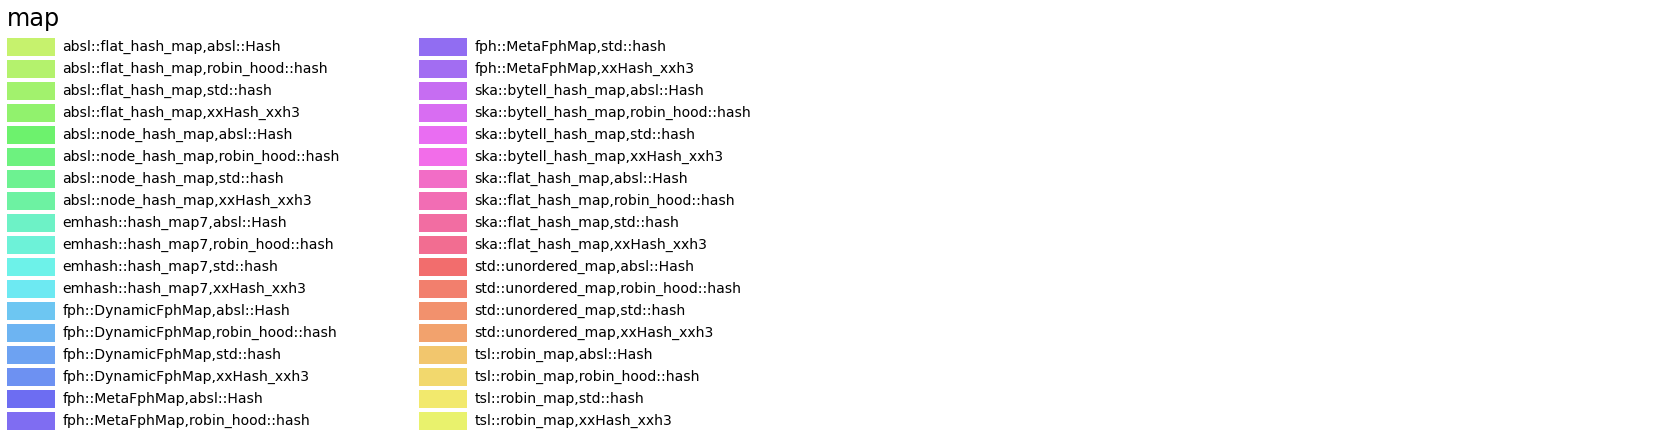

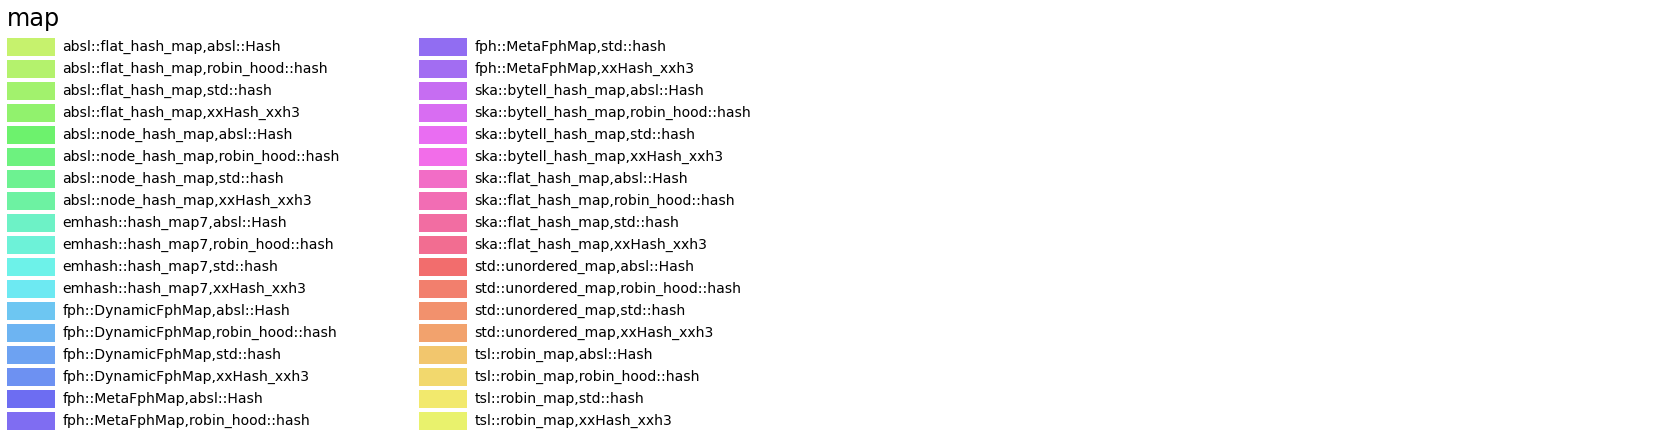

In [162]:
print(map_name_list)
map_num = len(map_name_list)
print(map_num)
print(map_hash_to_rgb_dict)
plot_colortable(map_hash_to_rgb_dict, "map", sort_colors=False, emptycols=2)